# Bayesian Bootstrap

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

# Plotting parameters
min_x = 160
max_x = 195

A simple implementation in Python of the `R` function `bayes_boot` described [here](http://www.sumsar.net/blog/2015/07/easy-bayesian-bootstrap-in-r/).

First we need a Dirichlet sampling function:

In [179]:
def random_dirichlet(dimension, size=1): 
    sample = np.random.exponential(1, (size, dimension))
    row_sums = sample.sum(axis=1)
    return sample/row_sums[:, np.newaxis]

Then our bootstrap built on top of the Dirichlet sampling:

In [180]:
def bayes_boot(data, size, sample_size, function=lambda x: x):
    dimension = len(data)
    weights = random_dirichlet(dimension, size)
    samples = np.array([function(np.random.choice(data, 
                                                  size=sample_size, 
                                                  replace=True, 
                                                  p=w)) 
                        for w in weights])
    return samples

Let us now use the function for estimating a credible interval for the median and mean of the height of American presidents:

In [181]:
presidents = pd.read_csv('http://www.sumsar.net/files/posts/2015-07-14-easy-bayesian-bootstrap-in-r/american_presidents.csv')

In [182]:
heights = list(presidents.height_cm)

Median: 182.0. Mean: 179.8.


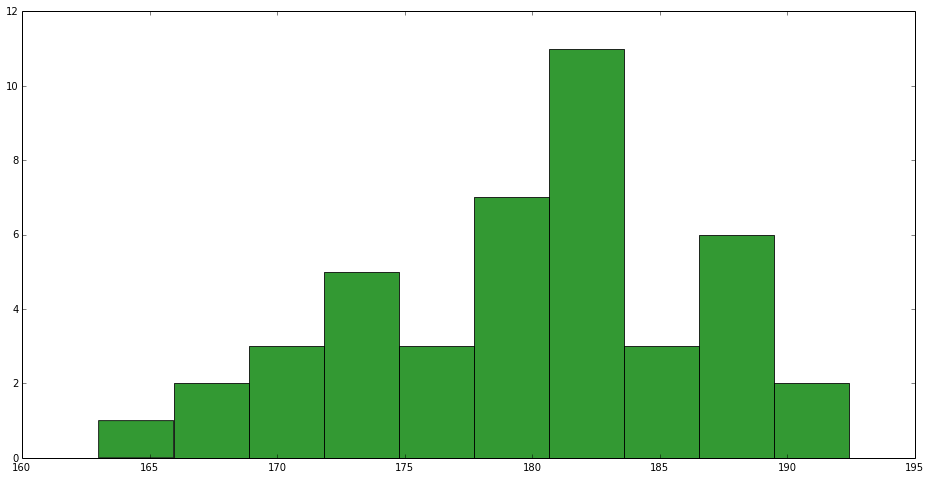

In [190]:
_ = plt.hist(heights, color='green',alpha=0.8)
plt.xlim([min_x, max_x])
print 'Median: {MEDIAN}. Mean: {MEAN}.'.format(MEDIAN=np.median(heights), MEAN=np.mean(heights))

Posterior of the median:

95% credible interval for the median: (178.0, 183.0)


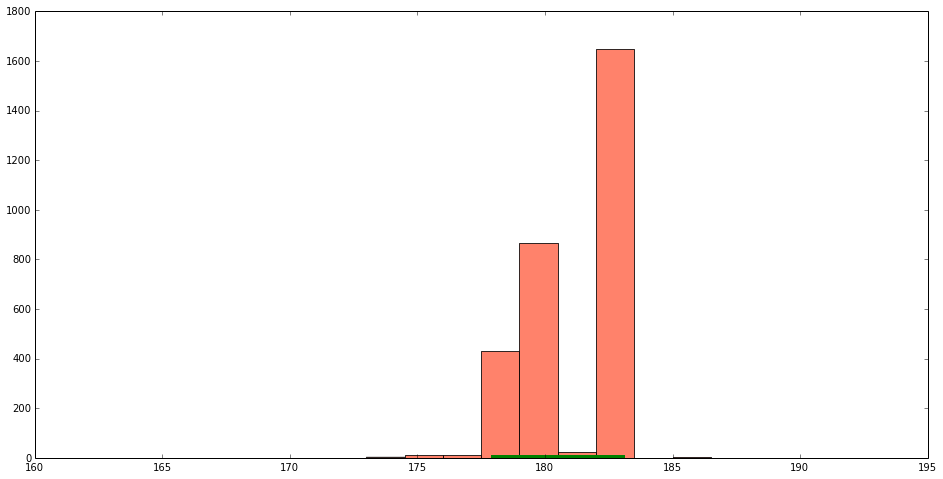

In [191]:
bayesian_median_heights = bayes_boot(heights, 3000, 1000, np.median)
_ = plt.hist(bayesian_median_heights, color='tomato',alpha=0.8)
a, b = np.percentile(bayesian_median_heights, [2.5, 97.5])
ci_lin_min = (a - min_x)/(max_x - min_x)
ci_lin_max = (b - min_x)/(max_x - min_x)
plt.xlim([min_x, max_x])
l = plt.axhline(y=.5, xmin=ci_lin_min, xmax=ci_lin_max, linewidth=6, color='green')
print '95% credible interval for the median: ({A}, {B})'.format(A=a, B=b)

Posterior of the mean:

95% credible interval for the mean: (177.734935, 181.820315)


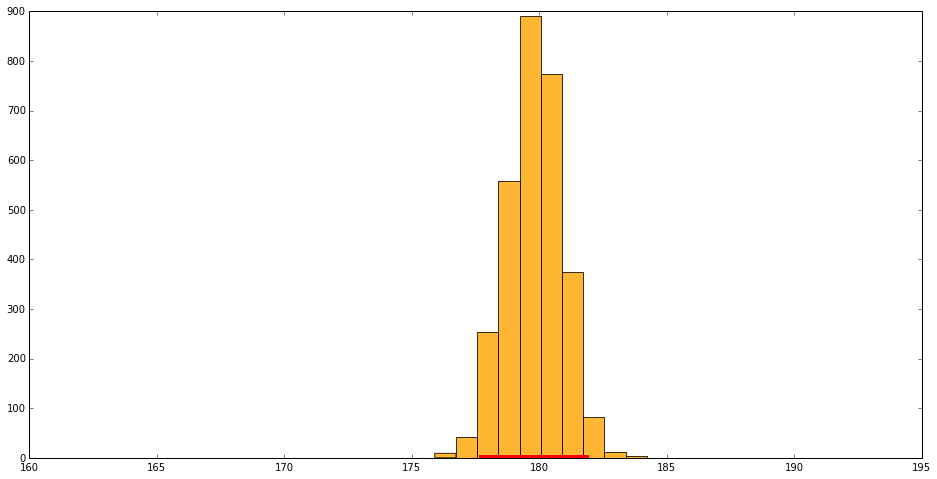

In [192]:
bayesian_mean_heights = bayes_boot(heights, 3000, 1000, np.mean)
_ = plt.hist(bayesian_mean_heights, color='orange',alpha=0.8)
a, b = np.percentile(bayesian_mean_heights, [2.5, 97.5])
ci_line_min = (a - min_x)/(max_x - min_x)
ci_line_max = (b - min_x)/(max_x - min_x)
plt.xlim([min_x, max_x])
l = plt.axhline(y=.5, xmin=ci_line_min, xmax=ci_line_max, linewidth=6, color='r')
print '95% credible interval for the mean: ({A}, {B})'.format(A=a, B=b)